<h1><center><b>Machine Learning</></center></h1>
<h4><center>89-511</center></h4>
<h3><center>Exercise 1 - Practical Part</center></h3>

Your Name:  
<font color='red'>
Netanel Landesman   
</font>


____________

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

Play with NumPy here:

### **2. Data**

##Data
We'll use CIFAR10 dataset.
It is a very familiar dataset. Please read a little bit [here](https://www.cs.toronto.edu/~kriz/cifar.html).

To import the dataset, we'll use the torch library. Don't dig about this library now, we will learn about it better in the next weeks.

In [5]:
import torch
from torchvision import datasets,transforms
import torchvision

ModuleNotFoundError: No module named 'torch'

In [27]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=1)

# CIFAR10 labels:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let's see a few images with their labels

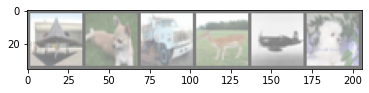

plane   dog truck  deer plane   dog


In [28]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

testiter = iter(testloader)
test_images, test_labels = testiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:6]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(6)))

Each image is represented as a RGB image.
each pixel has a number between 0 and 1 on each dimension.

In [29]:
images[0].size(), images[3].size(), images[0].ndim


(torch.Size([3, 32, 32]), torch.Size([3, 32, 32]), 3)

CIFAR is a big datadset, let's use only 100 images and convert them to numpy arrays

#### Train Set

In [30]:
x_train = np.array(images)
y_train = np.array(labels)

In [31]:
x_train.shape, y_train.shape

((100, 3, 32, 32), (100,))

#### Test Set

In [32]:
x_test = np.array(test_images)
y_test = np.array(test_labels)
x_test.shape, y_test.shape
#x_test.size

((10, 3, 32, 32), (10,))

### **3. KNN**

First of all, let's implement euclidean distance function, so we will be able to calculate closeness between images.

**A reminder**: the euclidean distance formula is:

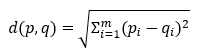

**Pay attention**: point representation might contains more than two numbers (means m>2).

In [33]:
def euclidean_distance(p1, p2):
  return np.sqrt(np.sum((p1 - p2)**2))

In [34]:
class KNeighborsClassifier:
  def __init__(self, n_neighbors=None):
    self.k = n_neighbors
    self.train_img_and_lable = []


  def fit(self, x, y):
    for i in range(0,100):
      self.train_img_and_lable.append([x[i],y[i], i]) 

  def calculate_distance_and_sort(self,x_test):
    dist_list = list()
    for i in range(0, 100):
      distance = euclidean_distance(x_test,x_train[i])
      dist_list.append([distance,i])
      arr = np.array(dist_list)
    return arr[arr[:, 0].argsort()]

  def get_k_idx_of_nearest_neighbor(self, sorted_dist_list):
    k_idx= list()
    for i in range(0, self.k):
      k_idx.append(int(sorted_dist_list[i][1]))
    return k_idx

  def get_k_nearest_neighbor_labels(self, top_k_idx):
    k_labels=list()
    for i in top_k_idx:
      k_labels.append(self.train_img_and_lable[i][1])
    return k_labels

  def predict(self, x_test):
    predict_list = list()
    for i in range(len(x_test)):
        sort_distance_array= self.calculate_distance_and_sort(x_test[i])
        k_idx = self.get_k_idx_of_nearest_neighbor(sort_distance_array)
        k_neigbhors_labels=self.get_k_nearest_neighbor_labels(k_idx)
        prediction = np.bincount(k_neigbhors_labels).argmax()
        predict_list.append(prediction)
    return predict_list


In [35]:
def error_rate(y_predict, y_true): 
  return np.mean(y_predict != y_true)

**Using KNN**

Use the KNeighborsClassifier class you've implemented with n_neighbors=1. Fit this KNN model to the training data.

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

**Predictions and Evaluations**

Use the predict method to predict values using your KNN model and x_test. In addition, create a [confusion matrix](https://www.sciencedirect.com/topics/engineering/confusion-matrix) and a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Make sure you don't get any errors in this cell.

In [37]:
pred = knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[0 0 0 0 0 0 1]
 [0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 2 1 0]
 [2 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           6       0.33      0.33      0.33         3
           8       0.00      0.00      0.00         2

    accuracy                           0.10        10
   macro avg       0.05      0.05      0.05        10
weighted avg       0.10      0.10      0.10        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

**Choosing a K Value**

Implement a for loop in 'find_best_k' function (hint: use KNeighborsClassifier object) that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.
The function will return the best k, and the error rate of each k as a numpy array.

In [38]:
MIN_K = 1
MAX_K = 15

def find_best_k(min_k=1, max_k=15):
  err_rate = []
  for k in range(MIN_K, MAX_K):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    err_rate.append([error_rate(pred, y_test),k])
  err_arr = np.array(err_rate)
  sort_err_arr = err_arr[err_arr[:,0].argsort()]
  return int(sort_err_arr[0][1]), err_arr[:,0]

  

In [39]:
best_k, error_rate = find_best_k(min_k=MIN_K, max_k=MAX_K)

Now create the following plot using the information from your for loop.

Text(0, 0.5, 'Error rate')

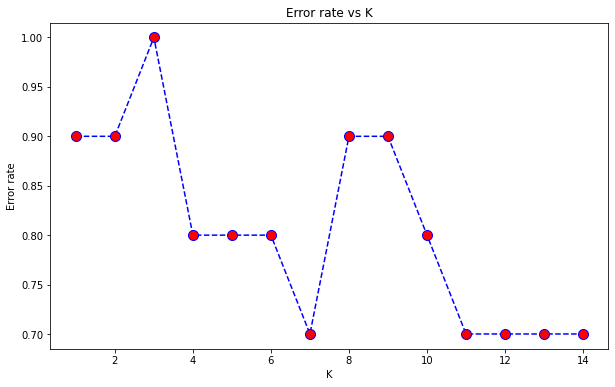

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(MIN_K,MAX_K),error_rate,color='blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

**Retrain with new K Value**

Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [41]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [42]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred, zero_division=0))

[[1 0 0 0 0 0]
 [0 0 0 1 0 1]
 [0 0 0 2 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 2 0]
 [1 1 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           6       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         2

    accuracy                           0.30        10
   macro avg       0.25      0.28      0.24        10
weighted avg       0.35      0.30      0.31        10



**:)**